In [ ]:
import requests

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=2LFIiMdTvuXZJ1HaadVEO0jcfxvNQ9S2dEckjNzBfIUel1Az7bZjLpQUNKX68azfAVAOSTulMA6t8RKPZauM%2Fg%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200110&endCreateDt=20201118'


response = requests.get(url)
status = response.status_code
text = response.text
print(text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><accDefRate>1.0499435105</accDefRate><accExamCnt>2834362</accExamCnt><accExamCompCnt>2791674</accExamCompCnt><careCnt>2842</careCnt><clearCnt>25973</clearCnt><createDt>2020-11-18 09:34:00.934</createDt><deathCnt>496</deathCnt><decideCnt>29311</decideCnt><examCnt>42688</examCnt><resutlNegCnt>2762363</resutlNegCnt><seq>326</seq><stateDt>20201118</stateDt><stateTime>00:00</stateTime><updateDt>null</updateDt></item><item><accDefRate>1.0451413254</accDefRate><accExamCnt>2815755</accExamCnt><accExamCompCnt>2774553</accExamCompCnt><careCnt>2644</careCnt><clearCnt>25860</clearCnt><createDt>2020-11-17 09:38:28.585</createDt><deathCnt>494</deathCnt><decideCnt>28998</decideCnt><examCnt>41202</examCnt><resutlNegCnt>2745555</resutlNegCnt><seq>325</seq><stateDt>20201117</stateDt><stateTime>00:00</stateTime><updateDt>null</updateDt></ite

In [ ]:
import xml.etree.ElementTree as ET
root = ET.fromstring(response.text)
covids = []
iter = root.iter(tag="item")
for element in iter:
  covid = {}
  covid["확진자"] = int(element.find("decideCnt").text)
  covid["날짜"] = int(element.find("stateDt").text)
  covids.append(covid)
print(covids)

[{'확진자': 29311, '날짜': 20201118}, {'확진자': 28998, '날짜': 20201117}, {'확진자': 28769, '날짜': 20201116}, {'확진자': 28546, '날짜': 20201115}, {'확진자': 28338, '날짜': 20201114}, {'확진자': 28133, '날짜': 20201113}, {'확진자': 27942, '날짜': 20201112}, {'확진자': 27799, '날짜': 20201111}, {'확진자': 27653, '날짜': 20201110}, {'확진자': 27553, '날짜': 20201109}, {'확진자': 27427, '날짜': 20201108}, {'확진자': 27284, '날짜': 20201107}, {'확진자': 27195, '날짜': 20201106}, {'확진자': 27050, '날짜': 20201105}, {'확진자': 26925, '날짜': 20201104}, {'확진자': 26807, '날짜': 20201103}, {'확진자': 26732, '날짜': 20201102}, {'확진자': 26635, '날짜': 20201101}, {'확진자': 26511, '날짜': 20201031}, {'확진자': 26385, '날짜': 20201030}, {'확진자': 26271, '날짜': 20201029}, {'확진자': 26146, '날짜': 20201028}, {'확진자': 26043, '날짜': 20201027}, {'확진자': 25955, '날짜': 20201026}, {'확진자': 25836, '날짜': 20201025}, {'확진자': 25775, '날짜': 20201024}, {'확진자': 25698, '날짜': 20201023}, {'확진자': 25543, '날짜': 20201022}, {'확진자': 25424, '날짜': 20201021}, {'확진자': 25333, '날짜': 20201020}, {'확진자': 25275, '날짜': 20201019}, {'확진자':

In [ ]:
cnt = len(covids)
decide = []
day = []
for i in range(1,cnt):
  decide.append(covids[i-1].get('확진자'))
  day.append(covids[i-1].get('날짜'))

decide

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________


## **코로나 19 확진자 수 예측 프로그래밍**

##**1. 데이터 수집**
공공데이터포털에서 코로나 확진자 수 데이터 제공 API를 활용




[사용한 데이터](https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15043376)

In [1]:
# 공공데이터 사이트에서 data 가져오기
# http 통신을 위한 requests 모듈 추가
import requests

URL = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"
serviceKey = "serviceKey=2LFIiMdTvuXZJ1HaadVEO0jcfxvNQ9S2dEckjNzBfIUel1Az7bZjLpQUNKX68azfAVAOSTulMA6t8RKPZauM%2Fg%3D%3D"
pageNo = "&pageNo=1&numOfRows=10";
dateRange = "&startCreateDt=20200110&endCreateDt=20201118";
response1 = requests.get(URL + "?" + serviceKey +pageNo + dateRange)

## **2. 데이터 전처리**
제공해주는 데이터 중에 날짜와 확진자 수만 가져오고 전처리

In [19]:
# 사용할 라이브러리 추가
# 우리가 사용할 데이터는 xml형식의 데이터이므로 json으로 변경하여 사용.
# json, xmltodict : xml형식을 dict형으로 변경하고 json으로 변경
# pandas : 데이터를 좀 더 쉽게 다루기 위해 pandas 모듈 추가.
# matplotlib : 시각화를 위해서 matplotlib 모듈 추가.
# numpy : 배열을 쉽게 다루기 위한 numpy 모듈 추가
# colab 외부 모듈 설치 : !pip install xmltodict
!pip install xmltodict
import json
import xmltodict 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# dict 형식으로 데이터를 저장.
jsonString = json.loads(json.dumps(xmltodict.parse(response1.text)))
print(jsonString)


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'accDefRate': '1.0499435105', 'accExamCnt': '2834362', 'accExamCompCnt': '2791674', 'careCnt': '2842', 'clearCnt': '25973', 'createDt': '2020-11-18 09:34:00.934', 'deathCnt': '496', 'decideCnt': '29311', 'examCnt': '42688', 'resutlNegCnt': '2762363', 'seq': '326', 'stateDt': '20201118', 'stateTime': '00:00', 'updateDt': 'null'}, {'accDefRate': '1.0451413254', 'accExamCnt': '2815755', 'accExamCompCnt': '2774553', 'careCnt': '2644', 'clearCnt': '25860', 'createDt': '2020-11-17 09:38:28.585', 'deathCnt': '494', 'decideCnt': '28998', 'examCnt': '41202', 'resutlNegCnt': '2745555', 'seq': '325', 'stateDt': '20201117', 'stateTime': '00:00', 'updateDt': 'null'}, {'accDefRate': '1.0425904108', 'accExamCnt': '2797691', 'accExamCompCnt': '2759377', 'careCnt': '2516', 'clearCnt': '25759', 'createDt': '2020-11-16 09:34:22.212', 'deathCnt': '494', 'decideCnt': '28769', 'examCnt': '38314', 'resu

In [4]:
datas = jsonString['response']['body']['items']['item']
datas

[{'accDefRate': '1.0499435105',
  'accExamCnt': '2834362',
  'accExamCompCnt': '2791674',
  'careCnt': '2842',
  'clearCnt': '25973',
  'createDt': '2020-11-18 09:34:00.934',
  'deathCnt': '496',
  'decideCnt': '29311',
  'examCnt': '42688',
  'resutlNegCnt': '2762363',
  'seq': '326',
  'stateDt': '20201118',
  'stateTime': '00:00',
  'updateDt': 'null'},
 {'accDefRate': '1.0451413254',
  'accExamCnt': '2815755',
  'accExamCompCnt': '2774553',
  'careCnt': '2644',
  'clearCnt': '25860',
  'createDt': '2020-11-17 09:38:28.585',
  'deathCnt': '494',
  'decideCnt': '28998',
  'examCnt': '41202',
  'resutlNegCnt': '2745555',
  'seq': '325',
  'stateDt': '20201117',
  'stateTime': '00:00',
  'updateDt': 'null'},
 {'accDefRate': '1.0425904108',
  'accExamCnt': '2797691',
  'accExamCompCnt': '2759377',
  'careCnt': '2516',
  'clearCnt': '25759',
  'createDt': '2020-11-16 09:34:22.212',
  'deathCnt': '494',
  'decideCnt': '28769',
  'examCnt': '38314',
  'resutlNegCnt': '2730608',
  'seq': '3

In [5]:
# pandas를 이용해 사용할 데이터(stateDt(기준일), decideCnt(확진자 수)) 정리
df = pd.DataFrame(datas)
df[["stateDt","decideCnt"]]

,stateDt,decideCnt
0,20201118,29311
1,20201117,28998
2,20201116,28769
3,20201115,28546
4,20201114,28338
...,...,...
323,20200205,18
324,20200204,0
325,20200203,15
326,20200202,2


## 사용할 데이터를 matplotlib를 사용해 확인해봤습니다.

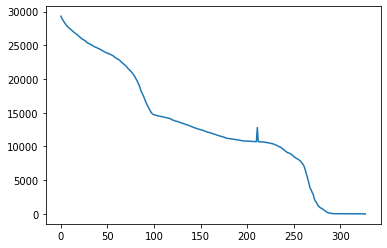

In [6]:
df["decideCnt"].astype(int).plot()

## 😥벌써부터 데이터가 이상함을 감지할 수 있었고 우선 데이터가 정렬되어 있지 않음을 확인하고 먼저 데이터를 정렬했습니다.

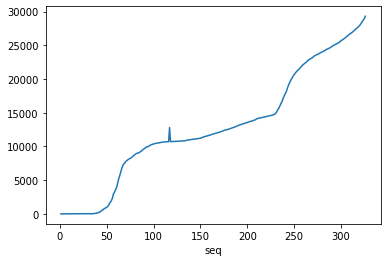

In [7]:
# 기존 DataFrame을 cdf에 복사하고 진행했습니다.
cdf = df
# 먼저 object 형식으로 되어있는 "seq"와 "decideCnt"를 int형으로 변경해줍니다.
cdf[["seq","decideCnt"]] = cdf[["seq","decideCnt"]].apply(pd.to_numeric)

# 그리고 "seq" 기준으로 정렬해준 뒤 "seq"를 인덱스로 사용하겠습니다.
# pandas에 대한 사용법은 https://dandyrilla.github.io/2017-08-12/pandas-10min/ , https://c10106.tistory.com/3977 를 참고했습니다.
cdf = cdf.sort_values(by="seq")
cdf = cdf.set_index("seq")

# 그 결과
cdf["decideCnt"].astype(int).plot()

## 🤔 결국 뭔가 데이터가 이상한 것을 확인할 수 있었습니다..
기존 확진자 수는 지속적으로 증가하는 값을 띄어야하는데 중간에 뾰족한 모습을 확인할 수 있습니다. 그래서 데이터를 조금 살펴보다가 또 이상한 점을 발견했습니다.
중간에 누적 확진자 수가 0으로 기록되어 있었습니다.
그래서 데이터를 전처리할 필요가 있었습니다,

In [8]:
zeroDatas = cdf["decideCnt"] == 0
cdf[zeroDatas]

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,stateDt,stateTime,updateDt
seq,,,,,,,,,,,,,
1,None,NaN,NaN,NaN,1,2020-01-31 17:47:33.33,0,0,1,NaN,20200101,18:00,2020-02-03 12:21:56.56
4,None,NaN,NaN,NaN,0,2020-02-03 21:26:59.59,0,0,0,NaN,20200204,00:00,None


## 본격적인 데이터 전처리
전처리 방법을 고민해본 결과 다음과 같은 방식을 사용하기로 했습니다.
- 적합하지 않은 데이터는 삭제한다.(중간에 확진자 수 0, 그래프의 뾰죡한 값)


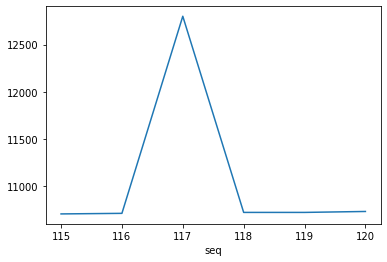

In [9]:
# 뾰족한 부분은 쉽게 찾을 수 있었습니다. -> seq : 117
cdf.loc[115:120]["decideCnt"].plot()

In [10]:
# 이제 값이 0이었던 seq : 4, 값에 오류가 있는 seq : 117를 삭제해줍니다.
cdf = cdf.drop([4,117])
# seq를 깔끔하게 바꾸고 싶지만, seq는 단지 정렬용이었으니 그냥 진행하겠습니다.
cdf

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,stateDt,stateTime,updateDt
seq,,,,,,,,,,,,,
1,None,NaN,NaN,NaN,1,2020-01-31 17:47:33.33,0,0,1,NaN,20200101,18:00,2020-02-03 12:21:56.56
2,None,NaN,NaN,NaN,2,2020-02-03 12:22:49.49,2,2,2,NaN,20200202,09:00,None
3,None,NaN,NaN,NaN,0,2020-02-03 14:41:17.17,0,15,0,NaN,20200203,09:00,2020-02-04 14:19:46.46
5,None,NaN,NaN,NaN,0,2020-02-04 23:56:31.31,0,18,129,NaN,20200205,09:00,2020-02-05 9:43:16.16
6,None,NaN,NaN,NaN,1,2020-02-05 20:05:40.40,0,19,40,NaN,20200205,19:00,2020-02-06 10:05:36.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0332542477,2777289,2742597,2210,25636,2020-11-14 09:31:38.207,492,28338,34692,2714259,20201114,00:00,null
323,1.0378476640,2786878,2750500,2362,25691,2020-11-15 09:40:16.172,493,28546,36378,2721954,20201115,00:00,null
324,1.0425904108,2797691,2759377,2516,25759,2020-11-16 09:34:22.212,494,28769,38314,2730608,20201116,00:00,null


In [11]:
# 추가로 공부하던 중 pandas에서 데이터 전처리를 도와주는 함수들이 있어서 시도해봤습니다.
# null이거나 중복되는 값들을 찾아주는 함수를 사용했습니다.
# 그 결과 모델에 사용할 "decideCnt" 값도 null 값이 없음을 확인할 수 있었습니다.
# 그러나 "decideCnt"값에 중복하는 데이터가 존재하였고 이 데이터가 날짜에 따라 증가하는
# 값들이 아니라면 문제가 있는 것으로 판단되기 때문에 한 번 확인해봤습니다.
print(cdf.isnull().sum(), " 중복 값 : " , cdf["decideCnt"].duplicated().sum())

accDefRate        59
accExamCnt        59
accExamCompCnt    59
careCnt           59
clearCnt           0
createDt           0
deathCnt           0
decideCnt          0
examCnt            0
resutlNegCnt      59
stateDt            0
stateTime          0
updateDt          98
dtype: int64  중복 값 :  27


In [12]:
duplicated = cdf["decideCnt"].duplicated()
cdf[duplicated == True]
# 확인해본 결과 문제는 없었습니다. 드디어 전처리 끝..

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,stateDt,stateTime,updateDt
seq,,,,,,,,,,,,,
9,None,NaN,NaN,NaN,2,2020-02-07 17:20:45.45,0,24,327,NaN,20200207,16:00,None
10,None,NaN,NaN,NaN,2,2020-02-08 10:09:34.34,0,24,620,NaN,20200208,09:00,None
11,None,NaN,NaN,NaN,2,2020-02-08 16:00:22.22,0,24,939,NaN,20200208,16:00,None
12,None,NaN,NaN,NaN,2,2020-02-08 16:48:05.05,0,24,939,NaN,20200208,16:00,None
13,None,NaN,NaN,NaN,2,2020-02-08 17:01:12.12,0,24,939,NaN,20200208,16:00,None
14,None,NaN,NaN,NaN,2,2020-02-08 17:01:34.34,0,24,939,NaN,20200208,16:00,None
17,None,NaN,NaN,NaN,3,2020-02-10 9:56:41.41,0,27,809,NaN,20200210,09:00,None
18,None,NaN,NaN,NaN,3,2020-02-10 17:03:49.49,0,27,531,NaN,20200210,16:00,2020-02-10 19:04:27.27
20,None,NaN,NaN,NaN,4,2020-02-11 17:09:25.25,0,28,762,NaN,20200211,16:00,None


## 👌마지막 확인
데이터가 잘 정돈된 모습을 볼 수 있었습니다❗❗

그리고 추가적으로 "시계열 데이터"라는 것에 대한 학습 후에 인덱스를 datetime형식으로 변경하였습니다.

"**시계열 데이터**" : 관측치가 시간적 순서를 가진 데이터

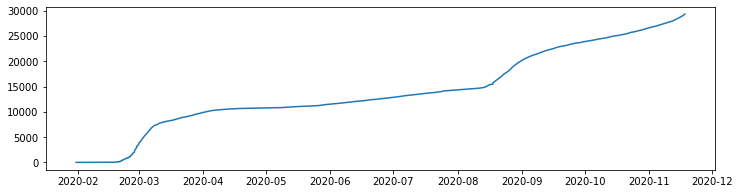

In [16]:
 dataTable = cdf.reset_index()

plt.figure(figsize=(12,3))

# pd.to_datetime()으로 datetime형식으로 변환 후에 .dt.date로 YYYY-MM-DD 형식으로 뽑음
plt.plot(pd.to_datetime(dataTable["createDt"]).dt.date,dataTable["decideCnt"])


## 🔥 드디어 전처리 끝, 모델링 시작



In [17]:
x_train = dataTable["seq"].to_numpy()
y_train = dataTable["decideCnt"].to_numpy()
train_size = int(len(x_train) * 0.7)
x_test = x_train[train_size:]
x_train = x_train[:train_size]
y_test = y_train[train_size:]
y_train = y_train[:train_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

(228,) (228,) (98,) (98,)
int64 int64 int64 int64


In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=(1,), activation='linear'),  
])

In [30]:
model.compile(
    optimizer='relu',
    loss ='mse'
)
              
model.summary()

ValueError: ignored

In [28]:
history = model.fit(x_train, y_train,epochs=100,
                    batch_size=4
                    )


Epoch 1/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 2/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/500
114/114 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/500
114/114 [===========================

In [26]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: nan


nan

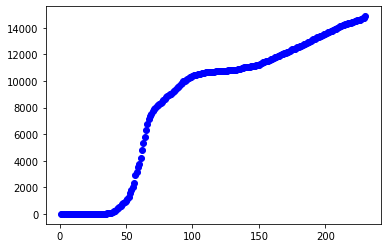

In [27]:
line_x = np.arange(min(x_train), max(x_train), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(x_train,y_train,'bo')
plt.show()